In [124]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
from numpy.lib import scimath as smath
from konlpy.tag import Okt
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [18]:
text = open('DataScience/data/09. alice.txt').read()
alice_mask = np.array(Image.open('DataScience/data/09. alice_mask.png'))

In [10]:
stopwords = set(STOPWORDS)
stopwords.add("said")

In [13]:
wc = WordCloud(background_color='white',
              max_words=2000,
              mask=alice_mask,
              stopwords= stopwords)

In [20]:
wc = wc.generate(text)

In [21]:
wc.words_

{'Alice': 1.0,
 'said Alice': 0.5888324873096447,
 'little': 0.4619289340101523,
 'the Queen': 0.36548223350253806,
 'one': 0.3197969543147208,
 'the King': 0.3147208121827411,
 'thing': 0.29949238578680204,
 'now': 0.28426395939086296,
 'Mock Turtle': 0.28426395939086296,
 'the Mock': 0.26903553299492383,
 'the Gryphon': 0.26903553299492383,
 'time': 0.2639593908629442,
 'quite': 0.2639593908629442,
 'the Hatter': 0.2639593908629442,
 'way': 0.25888324873096447,
 'think': 0.2436548223350254,
 'went on': 0.2436548223350254,
 'you know': 0.22842639593908629,
 'first': 0.2182741116751269,
 'come': 0.2182741116751269,
 'voice': 0.2131979695431472,
 'the Duchess': 0.20812182741116753,
 'Why': 0.20304568527918782,
 'never': 0.19289340101522842,
 "I'm": 0.18781725888324874,
 'tone': 0.18781725888324874,
 'came': 0.17766497461928935,
 'the Dormouse': 0.17766497461928935,
 'nothing': 0.17258883248730963,
 'day': 0.16751269035532995,
 'large': 0.16751269035532995,
 'well': 0.16243654822335024,


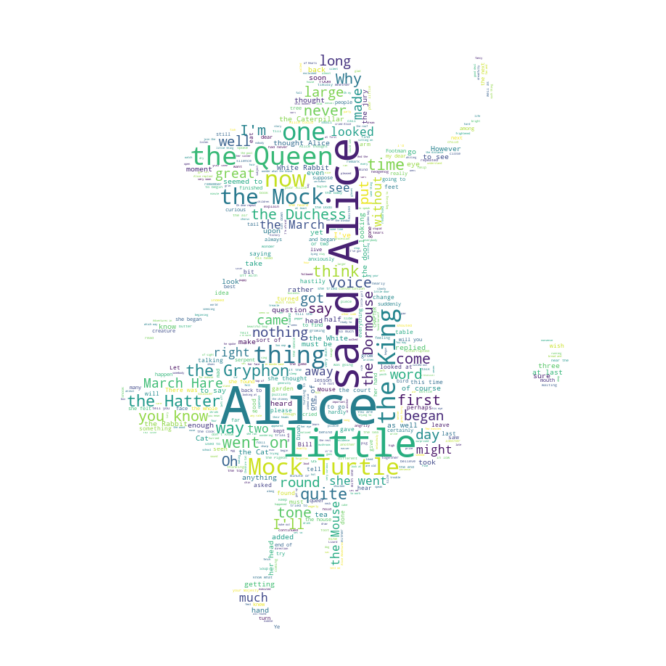

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# new

In [ ]:
text = open('DataScience/data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE's", 'Luke')
mask = np.array(Image.open('DataScience/data/09. stormtrooper_mask.png'))

In [7]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [8]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [9]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [10]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [11]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'her': False,
   'me': False,
   'you': True,
   'hate': False,
   'like': True,
   'i': True},
  'pos'),
 ({'her': False,
   'me': False,
   'you': True,
   'hate': True,
   'like': False,
   'i': True},
  'neg'),
 ({'her': False,
   'me': True,
   'you': True,
   'hate': False,
   'like': True,
   'i': False},
  'neg'),
 ({'her': True,
   'me': False,
   'you': False,
   'hate': False,
   'like': True,
   'i': True},
  'pos')]

# 2020.07.22

In [76]:
vectorizer = CountVectorizer(min_df=1)
# 학습 데이터
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']
# 테스트 데이터
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']

In [77]:
# 형태소 분석기 알고리즘 : okt
t = Okt()

In [78]:
# 문장 토큰화
contents_tokens = [t.morphs(row) for row in contents]
new_post_tokens = [t.morphs(row) for row in new_post]

In [79]:
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [80]:
new_post_for_vectorize = []
for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [97]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
X = vectorizer.fit_transform(contents_for_vectorize)

In [92]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [94]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [84]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [99]:
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [100]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [106]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [107]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [120]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = smath.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf, idf

In [109]:
sp.log(3/3)

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  """Entry point for launching an IPython kernel.


0.0

In [114]:
smath.log(3/3)

0.0

In [116]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

In [123]:
print(tfidf('a',a,D))
print(tfidf('b', abb, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [134]:
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [135]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [146]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
# new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [147]:
vectorizer2 = CountVectorizer(min_df=1)
X = vectorizer2.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
new_post_vec = vectorizer2.transform(new_post_for_vectorize)

In [148]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.88   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.09   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.05   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.88
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


In [151]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=39de504fb1fc480c2d419d1df70ccfa8bc84bca7dad212e1b7ff321af38f0636
  Stored in directory: c:\users\205\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
  Created wheel for boto3: filename=boto3-1.14.25-py2.py3-none-any.whl size=127659 sha256=f6edf39eabb3398288bffe8f8f28ef28cdf7403e6653d77894dbfd3f4544260b
  Stored in directory: c:\users\205\appdata\local\pip\cache\wheels\bc\73\48\8b529ad1832b17e4c94e6efb98037b418c93efe74f367ff408
Successfully built smart-open boto3
Note: you may need to restart the kernel to use updated packages.


In [149]:
import gensim
from gensim.models import word2vec

ModuleNotFoundError: No module named 'gensim'